In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

In [3]:
resolution = 10

In [4]:
def tx_prob(tx_power,ch_gain):
    k = 2
    diff = tx_power-ch_gain
    offset = 1
    x = diff+offset
    y = (1 + np.exp(-k*(1+offset))) / (1 + np.exp(-k*x)) 
    y = y*2-1.1
    y = np.clip(y,0,1)
    
    return np.where(tx_power<0.01,0,y)

In [5]:
def utility(sn_power,req):
    u = sn_power/req
    return np.where(u>1,1,u)

NameError: name 'lgnd' is not defined

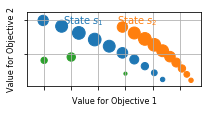

In [6]:

idx = np.arange(resolution)
alloc_range = np.linspace(start=0.1, stop=0.9, num=3)

single_column_figure_width = 3.487
double_column_figure_width = 7

my_column_fig_width = 3.11
my_column_fig_height = 1.35

fig_width = my_column_fig_width
fig_height = my_column_fig_height

fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)


for alloc in [0.9]:
    tx_dc = np.linspace(start=0.1, stop=0.9, num=resolution) * alloc
    sn_dc = alloc - tx_dc
    tx_success = tx_prob(tx_dc, ch_gain=0.7)
    utilization = utility(sn_dc, req=0.8)
    
    tx_success_2 = tx_prob(tx_dc, ch_gain=0.3)
    utilization_2 = utility(sn_dc, req=0.9)
    
    exp_utility = tx_success*utilization
    exp_utility_2 = tx_success_2*utilization_2
    
    axs.scatter(tx_success,utilization, s=10*np.exp(8*exp_utility), label= r'PO curve for State $s_1$')
    axs.scatter(tx_success_2,utilization_2, s=10*np.exp(8*exp_utility), label=r'PO curve for State $s_2$')
    axs.scatter([0.6,0.3, 0.4],[0.2, 0.4, 0.45], s=[10, 40, 70], label="Pareto-Dominated")

#     plt.xlim([-0.1,1.1])
#     plt.ylim([-0.1,1.1])
    axs.set_xlabel("Value for Objective 1")
    axs.set_ylabel("Value for Objective 2")
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    
    axs.text(0.37,0.95,r'State $s_1$', color='tab:blue')
    axs.text(0.57,0.95,r'State $s_2$', color='tab:orange')
    
    axs.grid()
#     lgnd = plt.legend( loc='center')

#     lgnd = plt.legend(ncol=2, loc='lower left', bbox_to_anchor=(0.6,0.8,1,1))
#     plt.title("fading="+str(fading)+ "   "+"qos="+str(qos))
    for handle in lgnd.legendHandles:
        handle.set_sizes([20.0])
fig.savefig('./figures/moo.png', dpi=300, bbox_inches='tight', transparent=True)